In [103]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

In [104]:
# Load the dataset and display the first 5 rows
df = pd.read_csv("dataset.csv")
df.head()

,order_id,category,price,quantity,order_date
0,1001,Grocery,2139.08,2,2023-08-16
1,1002,Stationery,1801.66,9,2023-09-22
2,1003,Furniture,4795.20,3,2023-09-05
3,1004,Stationery,962.64,2,2023-09-04
4,1005,Stationery,497.17,10,2023-06-04


In [105]:
# How many rows and columns are present in the dataset?
print(df.shape)
df.info()

(1200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    1200 non-null   int64  
 1   category    1200 non-null   object 
 2   price       1200 non-null   float64
 3   quantity    1200 non-null   int64  
 4   order_date  1200 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 47.0+ KB


In [106]:
# What are the data types of each column?
df.dtypes

order_id        int64
category       object
price         float64
quantity        int64
order_date     object
dtype: object

In [107]:
# Are there any missing values? If yes, in which columns?

In [108]:
df.shape

(1200, 5)

In [109]:
# Are there any missing values? If yes, in which columns?
print(df.isnull().sum())
print("There is no missing values in dataset")

order_id      0
category      0
price         0
quantity      0
order_date    0
dtype: int64
There is no missing values in dataset


In [110]:
# How many unique categories are present?
df["category"].unique()

array(['Grocery', 'Stationery', 'Furniture', 'Clothing', 'Electronics'],
      dtype=object)

In [111]:
# How many orders were placed in total?
df["order_id"].count()


np.int64(1200)

In [112]:
#Category wise orders 
df.groupby("category")["category"].count()

category
Clothing       233
Electronics    255
Furniture      227
Grocery        240
Stationery     245
Name: category, dtype: int64

In [113]:
len(df)

1200

In [114]:
len(df)
df.shape[0]
df["order_id"].nunique()


1200

In [167]:
# What is the average price of products?
print(f"The avg price of products is : {df['price'].mean()}")

The avg price of products is : 2512.541366666667


In [116]:
# What is the median quantity sold?
df['quantity'].median()

8.0

In [117]:
# What is the maximum and minimum price?
print(f"Maxium price : {df['price'].max()}")
print(f"Minimum price : {df['price'].min()}")

Maxium price : 4996.8
Minimum price : 51.18


In [119]:
# Which category has the highest average price?
df.groupby('category')['price'].mean().sort_values(ascending=False).head(1)

category
Stationery    2590.064
Name: price, dtype: float64

In [120]:
# What is the standard deviation of price?
df['price'].std()

1428.220393134444

In [121]:
# Total quantity sold per category.
df.groupby('category')['quantity'].sum()

category
Clothing       1735
Electronics    1881
Furniture      1649
Grocery        1816
Stationery     1943
Name: quantity, dtype: int64

In [173]:
# Create a new column for revenue.
df['revenue'] =  df['price'] * df['quantity']
df.head()

,order_id,category,price,quantity,order_date,revenue,month,day_type
0,1001,Grocery,2139.08,2,2023-08-16,4278.16,8,Weekday
1,1002,Stationery,1801.66,9,2023-09-22,16214.94,9,Weekday
2,1003,Furniture,4795.20,3,2023-09-05,14385.60,9,Weekday
3,1004,Stationery,962.64,2,2023-09-04,1925.28,9,Weekday
4,1005,Stationery,497.17,10,2023-06-04,4971.70,6,Weekend


In [174]:
# Total revenue per category.
df['revenue'] = df['price'] * df['quantity']
df.groupby('category')['revenue'].sum()

category
Clothing       4194856.83
Electronics    4603323.64
Furniture      4178006.40
Grocery        4456058.98
Stationery     4980470.23
Name: revenue, dtype: float64

In [175]:
# Which category contributes the highest revenue?
df['revenue'] = df['price'] * df['quantity']
df.groupby('category')['revenue'].sum().sort_values(ascending=False).head(1)

category
Stationery    4980470.23
Name: revenue, dtype: float64

In [170]:
# Which category has the lowest average quantity sold?
df.head()
df.groupby('category')['quantity'].mean().sort_values(ascending=True).head(1)

category
Furniture    7.264317
Name: quantity, dtype: float64

In [171]:
# Compare average price across categories.
df.head()
df.groupby('category',as_index=False)['price'].mean()

,category,price
0,Clothing,2395.986652
1,Electronics,2483.263490
2,Furniture,2576.781630
3,Grocery,2516.906042
4,Stationery,2590.064000


In [128]:
# What is the total revenue generated?
print(f"The total revenue is {df['revenue'].sum()} ")

The total revenue is 22412716.08 


In [129]:
# What is the average revenue per order?

df.groupby('order_id')['revenue'].sum().mean()

np.float64(18677.2634)

In [130]:
# Find the top 5 highest revenue orders.
df.groupby('order_id',as_index=False)['revenue'].sum().sort_values('revenue',ascending=False).head(5)

,order_id,revenue
152,1153,69746.04
130,1131,69250.58
1086,2087,68649.84
311,1312,68246.64
667,1668,67343.50


In [131]:
# Which category has the highest average revenue per order?
# df.groupby(['order_id','category'])['revenue'].sum().groupby('category').mean().sort_values(ascending=False).head(1)
order_rev = df.groupby(['order_id','category'])['revenue'].sum()
order_rev.groupby('category').mean().idxmax()

'Stationery'

In [132]:
order_rev = df.groupby(['order_id','category'])['revenue'].sum()
order_rev.groupby('category').mean().idxmax()

'Stationery'

In [133]:
# How many orders were placed per month?
df['month'] = pd.to_datetime(df['order_date']).dt.month
df.groupby('month')['order_id'].count()

month
1      84
2      98
3      98
4     109
5      99
6      92
7     119
8      97
9      97
10     91
11    112
12    104
Name: order_id, dtype: int64

In [134]:
# Which month has the highest number of orders?
df.groupby('month')['order_id'].count().sort_values(ascending=False).head(1)

# df['month'].value_counts().idxmax()

month
7    119
Name: order_id, dtype: int64

In [135]:
# Which month generated the highest revenue?
df.head()
df.groupby('month',as_index=False)['revenue'].sum().sort_values("revenue",ascending=False).head(1)

,month,revenue
10,11,2111319.48


In [136]:
# What is the average daily revenue?
df.groupby('order_date')['revenue'].sum().agg(['mean'])

mean    63312.757288
Name: revenue, dtype: float64

In [176]:
# Are there any seasonal trends visible?

print(df.groupby('month')['order_id'].count().sort_values(ascending=False).head())
print(df.groupby('month',as_index=False)['revenue'].sum().sort_values('revenue',ascending=False).head(5))
conclusion = """
Yes, seasonal trends are visible in the data.
Months 11 and 12 show the highest number of orders as well as maximum revenue,
indicating a strong year-end seasonal effect. 
This could be due to festivals, discounts, or increased consumer spending toward the end of the year. 
Hence, demand is not evenly distributed across months.
"""
print(conclusion)

month
7     119
11    112
4     109
12    104
5      99
Name: order_id, dtype: int64
    month     revenue
10     11  2111319.48
3       4  2088496.48
11     12  2044856.56
6       7  2024144.83
1       2  2006394.85

Yes, seasonal trends are visible in the data.
Months 11 and 12 show the highest number of orders as well as maximum revenue,
indicating a strong year-end seasonal effect. 
This could be due to festivals, discounts, or increased consumer spending toward the end of the year. 
Hence, demand is not evenly distributed across months.



In [178]:
#  Is price distribution skewed?
df['price'].skew()

np.float64(-0.007717994301616782)

Text(0.5, 1.0, 'Histogram of price of product')

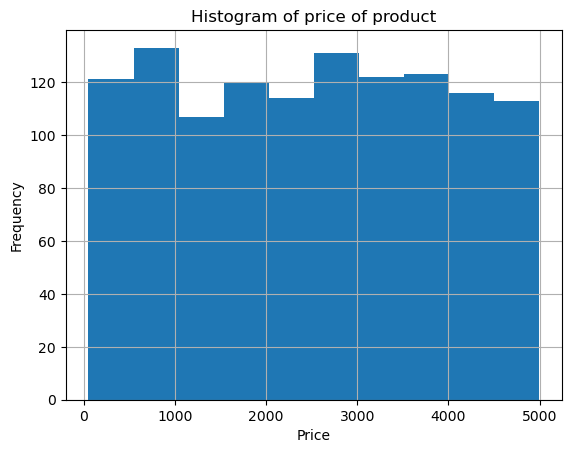

In [179]:
# Plot a histogram of price.
plt.hist(df['price'],bins=10)
plt.grid()
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of price of product")

Text(0.5, 1.0, 'Outliers checking ')

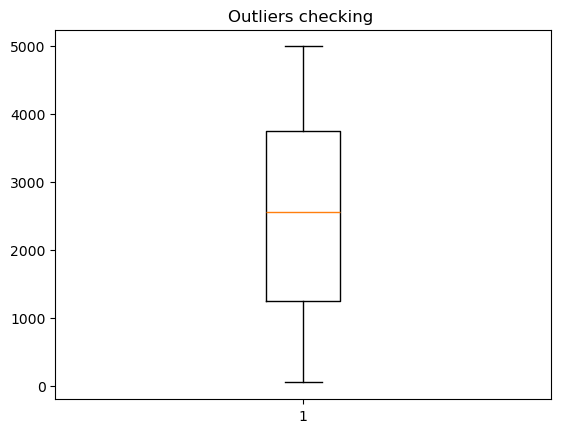

In [180]:
# Plot a boxplot of price to detect outliers.
plt.boxplot(df['price'])
plt.title("Outliers checking ")

In [181]:
# Identify outliers in price using IQR.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1 
upper_bound = Q3 + 1.5 * IQR 
lower_bound = Q1 - 1.5 * IQR 
print(upper_bound,lower_bound)
outliers_iqr = df[(df['price'] < lower_bound) | (df['price'] > upper_bound) ]
outliers_iqr

7494.026250000001 -2496.8237500000005


,order_id,category,price,quantity,order_date,revenue,month,day_type


In [182]:
# How many outliers are present?
print(outliers_iqr.shape[0])
conclusion_outliers = """ 
Although the boxplot may visually show extreme values,
the IQR method confirms that no price values lie outside the statistical bounds.
Hence, no outliers are detected in the price column.
"""
print(conclusion_outliers)

0
 
Although the boxplot may visually show extreme values,
the IQR method confirms that no price values lie outside the statistical bounds.
Hence, no outliers are detected in the price column.



In [183]:
# What is the most common quantity sold?
print(f"The Most common quantity that is sold is : {df['quantity'].mode().iloc[0]} ")

The Most common quantity that is sold is : 12 


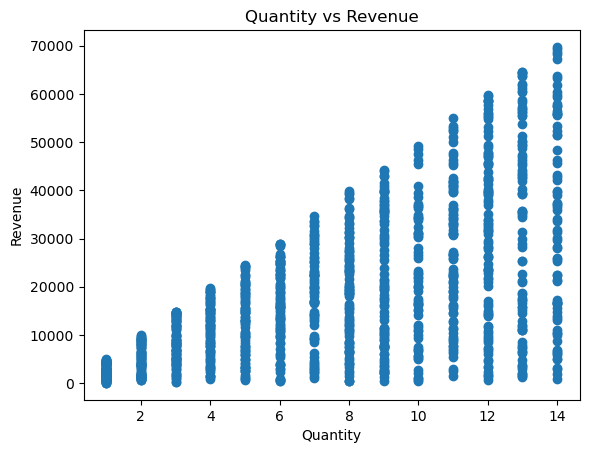

,quantity,revenue
quantity,1.000000,0.619943
revenue,0.619943,1.000000


In [184]:
import matplotlib.pyplot as plt

plt.scatter(df['quantity'], df['revenue'])
plt.xlabel("Quantity")
plt.ylabel("Revenue")
plt.title("Quantity vs Revenue")
plt.show()
df[['quantity', 'revenue']].corr()


-0.01916442703778701

The quantity distribution is approximately symmetric. 
The skewness value -0.01916442703778701 is very close to zero,
indicating no significant skewness or imbalance.



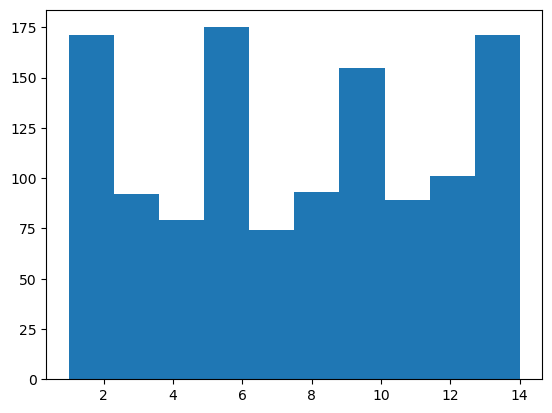

In [185]:
# Does the quantity distribution show any skewness or imbalance?
df.head()
plt.hist(df['quantity'])
skewness = df['quantity'].skew()
print(skewness)
Con =  f"""
The quantity distribution is approximately symmetric. 
The skewness value {skewness} is very close to zero,
indicating no significant skewness or imbalance.
"""
print(Con)

Text(0.5, 0, 'Quantity')

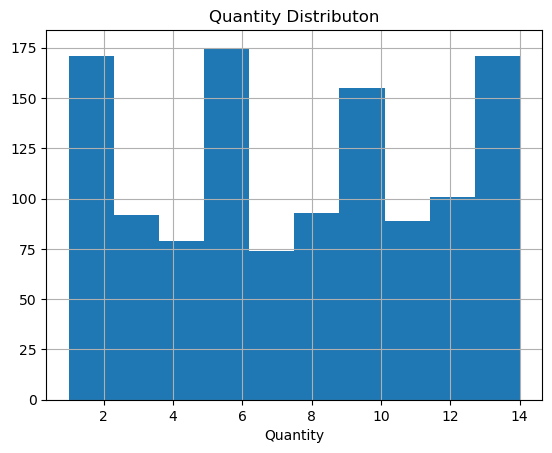

In [186]:
# Plot quantity distribution.
plt.hist(df['quantity'])
plt.grid()
plt.title("Quantity Distributon")
plt.xlabel("Quantity")

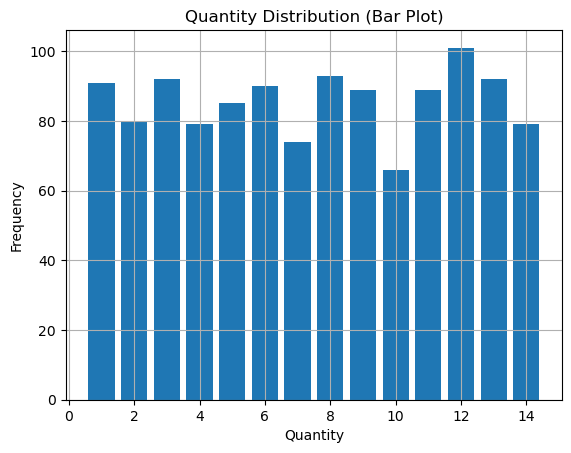

In [187]:
freq = df['quantity'].value_counts().sort_index()
import matplotlib.pyplot as plt

plt.bar(freq.index, freq.values)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Quantity Distribution (Bar Plot)")
plt.grid()
plt.show()


Empty DataFrame
Columns: [order_id, category, price, quantity, order_date, revenue, month, day_type]
Index: []
 The is no outliers in quantity 


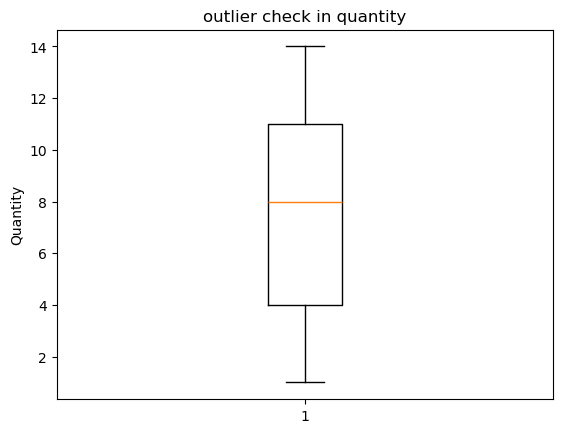

In [190]:
# Are there outliers in quantity?
#By Boxplot 
plt.boxplot(df['quantity'])
plt.title("outlier check in quantity")
plt.ylabel("Quantity")

#By IQR 
Q1= df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound_q = Q1 - 1.5 *  IQR 
upper_bound_q = Q3 + 1.5 * IQR 
iqr_test = df[(df['quantity'] < lower_bound_q) | (df['quantity'] > upper_bound_q)]
print(iqr_test)
con = " The is no outliers in quantity "
print(con)

In [191]:
# Is there a correlation between price and quantity?
print(df[['price','quantity']].corr())
print("The correlation between price and quantity is very weak and slightly negative (−0.037)")

             price  quantity
price     1.000000 -0.037485
quantity -0.037485  1.000000
The correlation between price and quantity is very weak and slightly negative (−0.037)


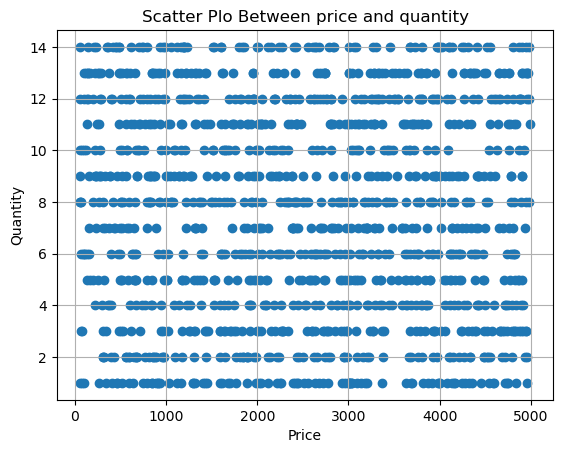

In [192]:
# Plot a scatter plot between price and quantity.
plt.scatter(df['price'],df['quantity'])
plt.title("Scatter Plo Between price and quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.grid(True)

No, expensive items do not necessarily sell less in quantity.


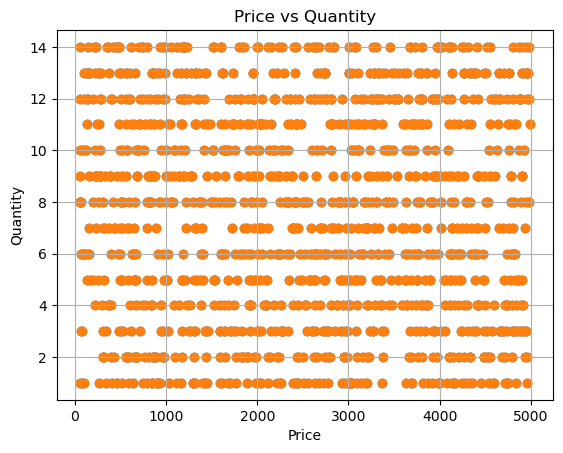

In [193]:
# Do expensive items sell less in quantity?
plt.scatter(df['price'], df['quantity'])
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Price vs Quantity")
plt.grid(True)
plt.scatter(df['price'],df['quantity'])
df[['price','quantity']].corr()
print("No, expensive items do not necessarily sell less in quantity.")

In [194]:
# Which category shows strongest price–quantity relationship?
print(df.groupby('category')[['price','quantity']].corr())
print("Grocery category Show Strongest price-quantity relationship")

                         price  quantity
category                                
Clothing    price     1.000000  0.027586
            quantity  0.027586  1.000000
Electronics price     1.000000 -0.044521
            quantity -0.044521  1.000000
Furniture   price     1.000000 -0.052609
            quantity -0.052609  1.000000
Grocery     price     1.000000 -0.086027
            quantity -0.086027  1.000000
Stationery  price     1.000000 -0.038532
            quantity -0.038532  1.000000
Grocery category Show Strongest price-quantity relationship


In [195]:
# Is revenue more dependent on price or quantity?
print(f"Correlation for price \n {df[['revenue','price']].corr()}")
print(f"correlaton for quantity \n {df[['revenue','quantity']].corr()}")
ans = """
Revenue is more dependent on price than quantity 
as the correlation between revenue and price is stronger than that between revenue and quantity in this dataset.
"""
print(ans)

Correlation for price 
          revenue    price
revenue  1.00000  0.66671
price    0.66671  1.00000
correlaton for quantity 
            revenue  quantity
revenue   1.000000  0.619943
quantity  0.619943  1.000000

Revenue is more dependent on price than quantity 
as the correlation between revenue and price is stronger than that between revenue and quantity in this dataset.



In [196]:
# Monthly revenue per category.
df.head()
df.groupby(['month','category'])['revenue'].sum()

month  category   
1      Clothing       263713.48
       Electronics    453224.72
       Furniture      314755.23
       Grocery        365627.86
       Stationery     363082.50
2      Clothing       350966.13
       Electronics    384510.05
       Furniture      408095.56
       Grocery        436243.35
       Stationery     426579.76
3      Clothing       338373.54
       Electronics    485057.86
       Furniture      254401.82
       Grocery        272001.87
       Stationery     488701.62
4      Clothing       491517.80
       Electronics    271310.31
       Furniture      369750.00
       Grocery        514836.07
       Stationery     441082.30
5      Clothing       349675.41
       Electronics    384174.65
       Furniture      260064.38
       Grocery        360883.86
       Stationery     481073.43
6      Clothing       379831.20
       Electronics    431967.43
       Furniture      370411.45
       Grocery        148595.89
       Stationery     455287.85
7      Clothing      

In [197]:
df.pivot_table(
    values='revenue',
    index='month',
    columns='category',
    aggfunc='sum'
)


category,Clothing,Electronics,Furniture,Grocery,Stationery
month,,,,,
1,263713.48,453224.72,314755.23,365627.86,363082.50
2,350966.13,384510.05,408095.56,436243.35,426579.76
3,338373.54,485057.86,254401.82,272001.87,488701.62
4,491517.80,271310.31,369750.00,514836.07,441082.30
5,349675.41,384174.65,260064.38,360883.86,481073.43
6,379831.20,431967.43,370411.45,148595.89,455287.85
7,333859.32,439942.94,384836.32,400649.65,464856.60
8,294354.42,240845.12,318168.52,503578.73,448265.87
9,316290.33,486275.19,288481.26,299999.22,216524.10


In [198]:
# Which category performs best in each month?
df2 = df.groupby(['category','month'])['revenue'].sum()
df2.groupby('month').idxmax()

month
1     (Electronics, 1)
2         (Grocery, 2)
3      (Stationery, 3)
4         (Grocery, 4)
5      (Stationery, 5)
6      (Stationery, 6)
7      (Stationery, 7)
8         (Grocery, 8)
9     (Electronics, 9)
10      (Clothing, 10)
11       (Grocery, 11)
12     (Furniture, 12)
Name: revenue, dtype: object

In [199]:
# Any category showing declining trend?
df.groupby(['category','month'])['revenue'].sum()
print("no category is declining trend")

no category is declining trend


In [200]:
# Any category showing declining trend?
monthly_cat_rev = df.groupby(['category','month'])['revenue'].sum().reset_index()
monthly_cat_rev.sort_values(['category','month'], inplace=True)
print(monthly_cat_rev)
ans = """
No category shows a consistent declining trend.
Revenue fluctuates across months for all categories,
but none display a sustained month-over-month decrease.
"""
print(ans)

       category  month    revenue
0      Clothing      1  263713.48
1      Clothing      2  350966.13
2      Clothing      3  338373.54
3      Clothing      4  491517.80
4      Clothing      5  349675.41
5      Clothing      6  379831.20
6      Clothing      7  333859.32
7      Clothing      8  294354.42
8      Clothing      9  316290.33
9      Clothing     10  373496.11
10     Clothing     11  361239.63
11     Clothing     12  341539.46
12  Electronics      1  453224.72
13  Electronics      2  384510.05
14  Electronics      3  485057.86
15  Electronics      4  271310.31
16  Electronics      5  384174.65
17  Electronics      6  431967.43
18  Electronics      7  439942.94
19  Electronics      8  240845.12
20  Electronics      9  486275.19
21  Electronics     10  150460.41
22  Electronics     11  413955.87
23  Electronics     12  461599.09
24    Furniture      1  314755.23
25    Furniture      2  408095.56
26    Furniture      3  254401.82
27    Furniture      4  369750.00
28    Furnitur

In [201]:
# Which category is most consistent across months?
(
    df.groupby(['category','month'])['revenue']
      .sum()
      .groupby('category')
      .std()
      .idxmin()
)

'Clothing'

In [202]:
# Which category has seasonal spikes?
df.groupby(['category','month'])['revenue'].sum()
df.groupby(['month','category'])['revenue'].sum().unstack()

category,Clothing,Electronics,Furniture,Grocery,Stationery
month,,,,,
1,263713.48,453224.72,314755.23,365627.86,363082.50
2,350966.13,384510.05,408095.56,436243.35,426579.76
3,338373.54,485057.86,254401.82,272001.87,488701.62
4,491517.80,271310.31,369750.00,514836.07,441082.30
5,349675.41,384174.65,260064.38,360883.86,481073.43
6,379831.20,431967.43,370411.45,148595.89,455287.85
7,333859.32,439942.94,384836.32,400649.65,464856.60
8,294354.42,240845.12,318168.52,503578.73,448265.87
9,316290.33,486275.19,288481.26,299999.22,216524.10


In [203]:
con_ans = """
Grocery shows the strongest seasonal spikes.
Its revenue varies sharply across months, 
with a significant drop in mid-year and pronounced peaks in later months,
indicating strong seasonality effects.
"""
print(con_ans)


Grocery shows the strongest seasonal spikes.
Its revenue varies sharply across months, 
with a significant drop in mid-year and pronounced peaks in later months,
indicating strong seasonality effects.



In [204]:
# Detect anomalies in revenue.
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

anomalies = df[(df['revenue'] < lower) | (df['revenue'] > upper)]
anomalies

,order_id,category,price,quantity,order_date,revenue,month,day_type
117,1118,Furniture,4556.18,14,2023-12-08,63786.52,12,Weekday
129,1130,Stationery,4523.43,14,2023-01-25,63328.02,1,Weekday
130,1131,Furniture,4946.47,14,2023-04-22,69250.58,4,Weekend
152,1153,Electronics,4981.86,14,2023-01-10,69746.04,1,Weekday
238,1239,Stationery,4269.45,14,2023-07-25,59772.30,7,Weekday
311,1312,Furniture,4874.76,14,2023-06-15,68246.64,6,Weekday
502,1503,Stationery,4707.33,13,2023-12-10,61195.29,12,Weekend
511,1512,Grocery,4967.02,13,2023-04-20,64571.26,4,Weekday
543,1544,Grocery,4759.82,13,2023-03-26,61877.66,3,Weekend
667,1668,Electronics,4810.25,14,2023-08-22,67343.50,8,Weekday


In [205]:
# Identify top 10% high-value orders.
threshold = df['revenue'].quantile(0.90)
top_10_percent_orders = df[df['revenue'] >= threshold]
top_10_percent_orders


,order_id,category,price,quantity,order_date,revenue,month,day_type
5,1006,Clothing,3866.38,11,2023-02-03,42530.18,2,Weekday
12,1013,Stationery,4749.07,11,2023-11-19,52239.77,11,Weekend
14,1015,Grocery,4772.73,11,2023-04-04,52500.03,4,Weekday
29,1030,Grocery,3539.38,12,2023-03-23,42472.56,3,Weekday
46,1047,Clothing,3804.04,14,2023-08-25,53256.56,8,Weekday
...,...,...,...,...,...,...,...,...
1172,2173,Stationery,4899.92,9,2023-04-08,44099.28,4,Weekend
1178,2179,Stationery,4123.64,12,2023-08-25,49483.68,8,Weekday
1184,2185,Stationery,4595.13,12,2023-04-17,55141.56,4,Weekday
1192,2193,Stationery,4105.31,11,2023-09-30,45158.41,9,Weekend


In [206]:
# Compare weekday vs weekend sales.
df['order_date'] = pd.to_datetime(df['order_date'])
df['day_type'] = df['order_date'].dt.dayofweek.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)
df.groupby('day_type')['revenue'].sum()



day_type
Weekday    16389611.44
Weekend     6023104.64
Name: revenue, dtype: float64

In [207]:
# Which category dominates high-value orders?
top_10_percent_orders.groupby('category')['revenue'].sum().sort_values(ascending=False)


category
Stationery     1488447.57
Clothing       1250623.59
Electronics    1205399.81
Furniture      1199194.75
Grocery        1188245.54
Name: revenue, dtype: float64

# Suggest 3 business insights from the analysis.
## 1️ Seasonality Impact
### Year-end months (11–12) generate maximum revenue, indicating strong seasonal demand.

## 2️ Revenue Dependency
### Revenue depends more on price than quantity, suggesting premium pricing strategies are effective.

## 3️ High-Value Orders Matter
### The top 10% of orders contribute a significant share of revenue, highlighting the importance of retaining high-value customers.